<a href="https://colab.research.google.com/github/Mounika10122006/FakeNewsDetection-/blob/main/stock_price_prediction__lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Price Prediction using LSTM

Created by: Mounika K  
2nd Year B.Sc (AIML)
Internship Project – June 2025.

In [1]:
# Install and import required libraries

In [2]:
!pip install yfinance pandas numpy matplotlib scikit-learn tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [4]:
# Load the stock price dataset

In [5]:
# Download TATASTEEL stock price data from Yahoo
df = yf.download('TATASTEEL.NS', start='2015-01-01', end='2024-12-31')
df = df[['Close']]  # Use only 'Close' prices
df.head()  # See the first 5 rows

/tmp/ipython-input-5-2185568836.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TATASTEEL.NS', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,TATASTEEL.NS
Date,
2015-01-01,30.958971
2015-01-02,31.441208
2015-01-05,31.896658
2015-01-06,30.350433
2015-01-07,29.768679


In [6]:
# Normalize the 'Close' prices using MinMaxScaler to scale values between 0 and 1

In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [8]:
# Create training dataset with 60-day lookback for LSTM
# X_train contains 60 previous prices, y_train contains the next price

In [9]:
X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])  # 60 previous days
    y.append(scaled_data[i])       # 61st day

X = np.array(X)
y = np.array(y)

In [10]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [11]:
# Build the LSTM model with two LSTM layers and two Dense layers

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - loss: 0.0154
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 5.9835e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.2747e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.2074e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 3.9958e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.6279e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3.0521e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 3.1946e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 3.4208e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 3.7858e-04


In [13]:
# Prepare test data and use the trained model to make predictions

In [14]:
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [15]:
# Plot actual vs predicted stock prices

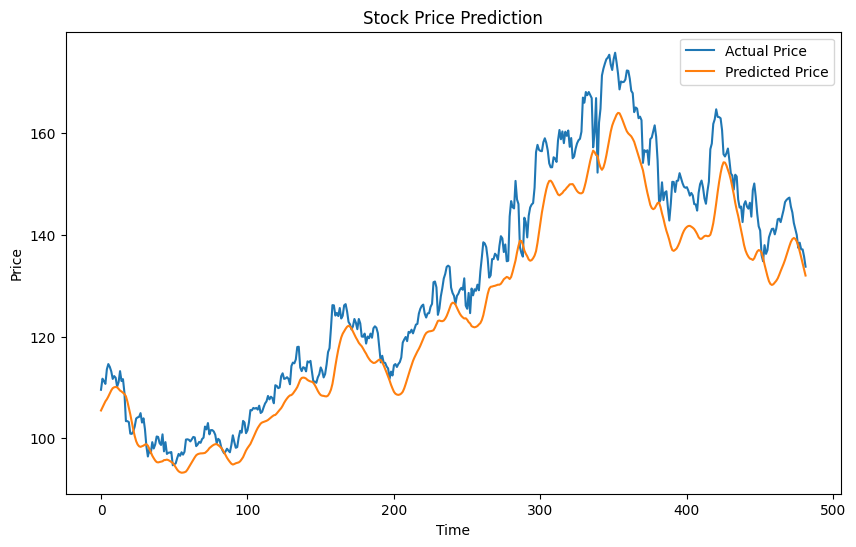

In [16]:
plt.figure(figsize=(10,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.savefig("prediction_plot.jpg")
plt.show()